<a href="https://colab.research.google.com/github/anmol0720/Linear-Regresssion---Data-Preprocessing/blob/master/TensorFlow_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Importing and Preprocessing

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
df=pd.read_csv('House_Price.csv',header=0)

In [5]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [6]:
df.shape

(506, 19)

In [7]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


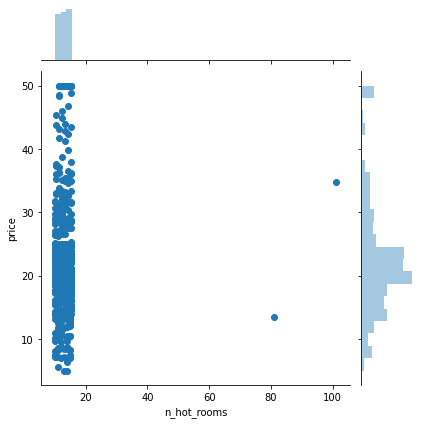

In [8]:
sns.jointplot(x='n_hot_rooms',y='price',data=df)

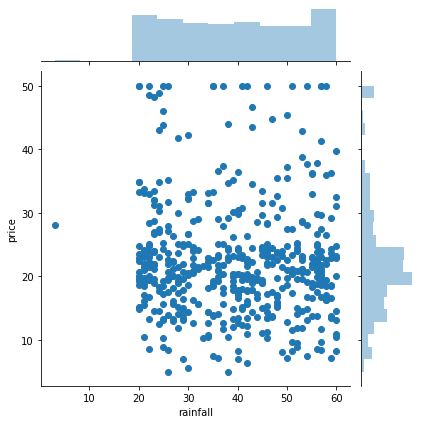

In [9]:
sns.jointplot(x='rainfall',y='price',data=df)

In [10]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


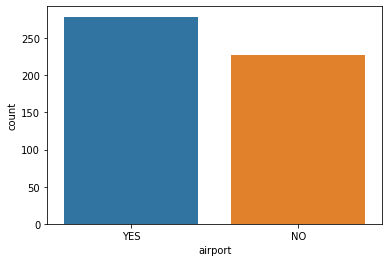

In [11]:
sns.countplot(x='airport',data=df)

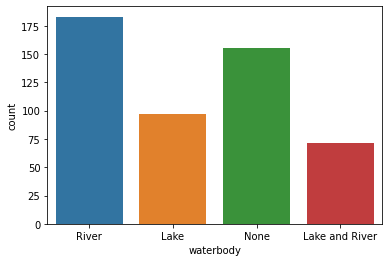

In [12]:
sns.countplot(x='waterbody',data=df)

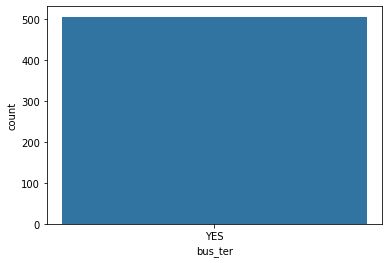

In [13]:
sns.countplot(x='bus_ter',data=df)

**Outlier Treatment**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [15]:
#n_hot_rooms and rainfall contain outliers
#99 percentile
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [16]:
np.percentile(df.n_hot_rooms,[99])[0]

15.399519999999999

In [0]:
ub=np.percentile(df.n_hot_rooms,[99])[0]

In [18]:
df[(df.n_hot_rooms>ub)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


Multiply 3 for upper limit 
and
0.3 for lower limit

*Limiting the values*

In [19]:
df.n_hot_rooms[(df.n_hot_rooms>3*ub)]=3*ub

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df[(df.n_hot_rooms>ub)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [21]:
np.percentile(df.rainfall,[1])[0]

20.0

In [0]:
lb=np.percentile(df.rainfall,[1])[0]

In [23]:
df[(df.rainfall<lb)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [24]:
df.rainfall[(df.rainfall<0.3*lb)]=0.3*lb

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df[(df.rainfall<lb)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


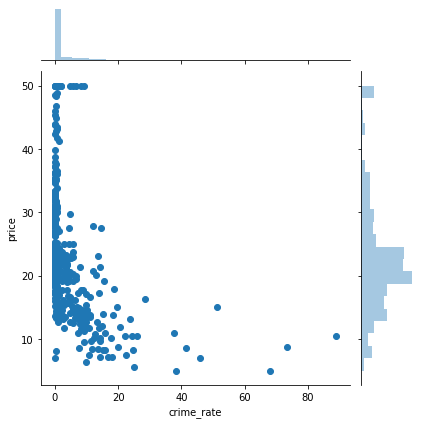

In [26]:
sns.jointplot(x='crime_rate',y='price',data=df)

In [27]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [0]:
df.n_hos_beds=df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float